In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.stats as st

## Cleanup

In [2]:
csv_data=pd.read_csv("smmh.csv")
clean_data_df=pd.DataFrame(csv_data)


In [3]:
# add ID column
clean_data_df.insert(0,"ID_number",range(1,len(clean_data_df)+1))


In [4]:
# rename columns
clean_data_df.columns =['ID_number', 'timestamp', 'age', 'gender', 'relationship_status', 'occupation_status', 'org_affiliations', 'use_social_media', 'SM_list', 'avg_time_per_day',
                  'how_often_use_sm_without_purpose', 'how_often_distracted_by_sm', 'feel_restless_wo_sm', 'how_easily_distracted', 'bothered_by_worries', 'difficult_to_concentrate',
                  'compare_self_to_others', 'feel_about_comparisons', 'seek_validation', 'feel_depressed', 'interest_in_daily_activ', 'sleep_issues']


In [5]:
# separate social media networks
clean_data_df.insert(9,"facebook",clean_data_df['SM_list'].str.contains("Facebook").map({True: 'Yes', False: 'No'}))
clean_data_df.insert(10,"twitter",clean_data_df['SM_list'].str.contains("Twitter").map({True: 'Yes', False: 'No'}))
clean_data_df.insert(11,"instagram",clean_data_df['SM_list'].str.contains("Instagram").map({True: 'Yes', False: 'No'}))
clean_data_df.insert(12,"youtube",clean_data_df['SM_list'].str.contains("YouTube").map({True: 'Yes', False: 'No'}))
clean_data_df.insert(13,"snapchat",clean_data_df['SM_list'].str.contains("Snapchat").map({True: 'Yes', False: 'No'}))
clean_data_df.insert(14,"discord",clean_data_df['SM_list'].str.contains("Discord").map({True: 'Yes', False: 'No'}))
clean_data_df.insert(15,"reddit",clean_data_df['SM_list'].str.contains("Reddit").map({True: 'Yes', False: 'No'}))
clean_data_df.insert(16,"pinterest",clean_data_df['SM_list'].str.contains("Pinterest").map({True: 'Yes', False: 'No'}))
clean_data_df.insert(17,"tiktok",clean_data_df['SM_list'].str.contains("TikTok").map({True: 'Yes', False: 'No'}))
clean_data_df=clean_data_df.drop("SM_list",axis=1)


In [6]:
#adding SM count
clean_data_df.insert(17,"platform_count",clean_data_df[["facebook","twitter","instagram","youtube","snapchat","discord","reddit","pinterest","tiktok"]].eq("Yes").sum(axis=1))


In [7]:
# making avg time/day easier to read
clean_data_df["avg_time_per_day"]=clean_data_df["avg_time_per_day"].replace({"Less than an Hour":"0-1","Between 1 and 2 hours":"1-2","Between 2 and 3 hours":"2-3","Between 3 and 4 hours":"3-4",
                                                                             "Between 4 and 5 hours":"4-5","More than 5 hours":"5+"})


In [8]:
# clean up gender (non-binary) responses
clean_data_df["gender"]=clean_data_df["gender"].replace({"Nonbinary ":"Non-binary","NB":"Non-binary","unsure ":"Non-binary","Non binary ":"Non-binary",
                                                                             "There are others???":"Non-binary"})

In [9]:
# aggregating construct scores
clean_data_df["depression_construct"]=clean_data_df["feel_depressed"]+clean_data_df["interest_in_daily_activ"]+clean_data_df["bothered_by_worries"]
clean_data_df["inattentive_construct"]=clean_data_df["how_easily_distracted"]+clean_data_df["difficult_to_concentrate"]+clean_data_df["how_often_distracted_by_sm"]
clean_data_df["valid_seek_construct"]=clean_data_df["compare_self_to_others"]+clean_data_df["feel_about_comparisons"]+clean_data_df["seek_validation"]


In [10]:
# drop 91 yo - extreme outlier, likely typo
clean_data_df=clean_data_df[clean_data_df["age"] < 75]


In [11]:
clean_data_df.to_csv("survey_data_cleaned.csv",index=False)

## Meredith

In [12]:
# read in csv
csv_data=pd.read_csv("survey_data_cleaned.csv")
data_df=pd.DataFrame(csv_data)


Curious whether, and to what extent, scores are related to age.

depression construct: correlation is -0.3797898036448572
inattentive construct: correlation is -0.3137708938393153
validation seeking construct: correlation is -0.08226522421476648


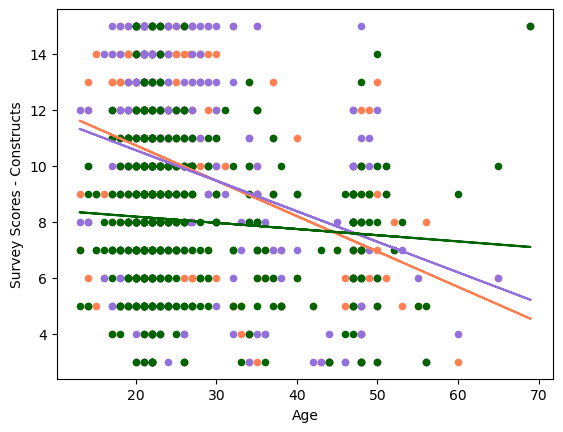

In [13]:
# mental health outcomes (interest in daily activities, compare yourself to others, seeking validation) by age

# mh construct scores by age
dep = data_df.plot.scatter("age","depression_construct", color="coral")
inatt = data_df.plot.scatter("age","inattentive_construct", color="mediumpurple",ax=dep)
validseek= data_df.plot.scatter("age","valid_seek_construct", color="darkgreen",ax=dep)
# plt.legend([dep,inatt,validseek],["Depression Construct","Inattentive Construct","Validation Seeking Construct"])
plt.xlabel("Age")
plt.ylabel("Survey Scores - Constructs")

# regression lines
(d_slope,d_intercept,d_rvalue,d_pvalue,d_sterr)=st.linregress(data_df["age"],data_df["depression_construct"])
d_regress_vals=data_df["age"]*d_slope+d_intercept
plt.plot(data_df["age"],d_regress_vals,"coral")

(i_slope,i_intercept,i_rvalue,i_pvalue,i_sterr)=st.linregress(data_df["age"],data_df["inattentive_construct"])
i_regress_vals=data_df["age"]*i_slope+i_intercept
plt.plot(data_df["age"],i_regress_vals,"mediumpurple")

(v_slope,v_intercept,v_rvalue,v_pvalue,v_sterr)=st.linregress(data_df["age"],data_df["valid_seek_construct"])
v_regress_vals=data_df["age"]*v_slope+v_intercept
plt.plot(data_df["age"],v_regress_vals,"darkgreen")

print(f"depression construct: correlation is {d_rvalue}")
print(f"inattentive construct: correlation is {i_rvalue}")
print(f"validation seeking construct: correlation is {v_rvalue}")
plt.savefig("output/mj_score_by_age.png", bbox_inches='tight')
plt.show()

Depression and intattentive constructs have similar correlations and the lines are nearly the same slope (i.e., scores fall similarly by age).


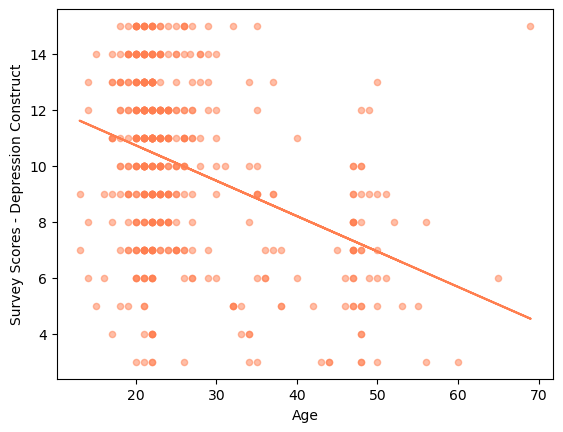

In [14]:
# looking at each dataset alone - depression
dep = data_df.plot.scatter("age","depression_construct", color="coral",alpha=.5)
plt.xlabel("Age")
plt.ylabel("Survey Scores - Depression Construct")
(d_slope,d_intercept,d_rvalue,d_pvalue,d_sterr)=st.linregress(data_df["age"],data_df["depression_construct"])
d_regress_vals=data_df["age"]*d_slope+d_intercept
plt.plot(data_df["age"],d_regress_vals,"coral")
plt.show()


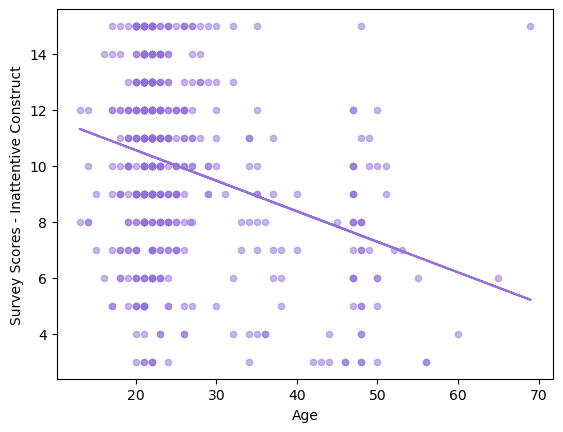

In [15]:
# looking at each dataset alone - inattentiveness
inatt = data_df.plot.scatter("age","inattentive_construct", color="mediumpurple",alpha=.5)
plt.xlabel("Age")
plt.ylabel("Survey Scores - Inattentive Construct")
(i_slope,i_intercept,i_rvalue,i_pvalue,i_sterr)=st.linregress(data_df["age"],data_df["inattentive_construct"])
i_regress_vals=data_df["age"]*i_slope+i_intercept
plt.plot(data_df["age"],i_regress_vals,"mediumpurple")
plt.show()


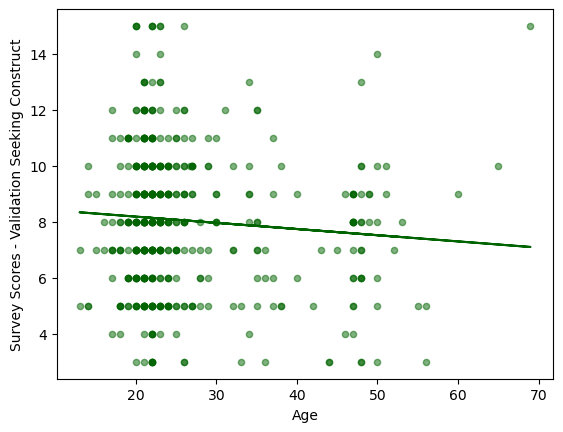

In [16]:
# looking at each dataset alone - validation seeking
validseek= data_df.plot.scatter("age","valid_seek_construct", color="darkgreen",alpha=.5)
plt.xlabel("Age")
plt.ylabel("Survey Scores - Validation Seeking Construct")
(v_slope,v_intercept,v_rvalue,v_pvalue,v_sterr)=st.linregress(data_df["age"],data_df["valid_seek_construct"])
v_regress_vals=data_df["age"]*v_slope+v_intercept
plt.plot(data_df["age"],v_regress_vals,"darkgreen")
plt.show()


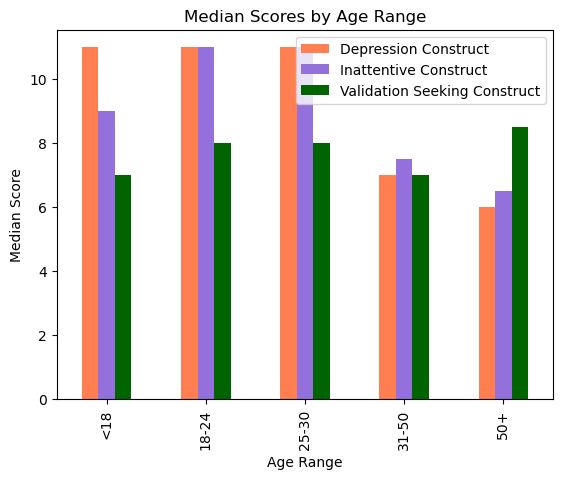

In [17]:
# age bins
age_bins = [0, 18, 24, 30, 50, 92]
age_bin_labels = ["<18", "18-24", "25-30", "31-50", "50+"]

# add bins column to df
age_df=data_df.copy()
age_df["age_range"]=pd.cut(age_df["age"],age_bins, labels=age_bin_labels, include_lowest=True)

age_df=age_df.groupby("age_range",observed=False)

# plot scores by age range
new_age_df=pd.DataFrame(age_df.median(numeric_only=True))
new_age_df=new_age_df.rename(columns={"depression_construct":"Depression Construct","inattentive_construct":"Inattentive Construct",
             "valid_seek_construct":"Validation Seeking Construct"})
new_age_df[["Depression Construct","Inattentive Construct","Validation Seeking Construct"]].plot.bar(color=["coral","mediumpurple","darkgreen"],
                                                                           xlabel="Age Range",ylabel="Median Score",title="Median Scores by Age Range")
plt.show()

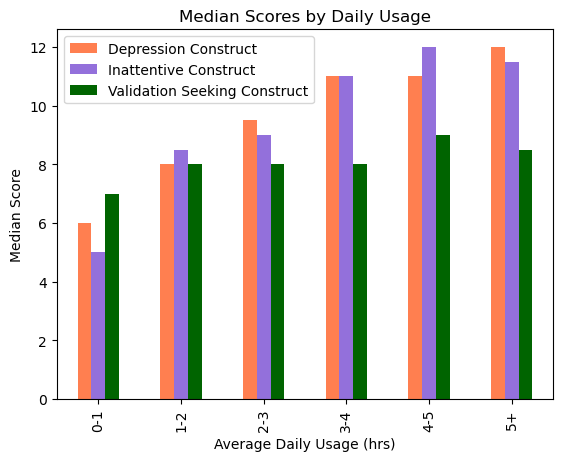

In [18]:
# making avg time/day easier to read - this is now done in cleanup section
# data_df["avg_time_per_day"]=data_df["avg_time_per_day"].replace({"Less than an Hour":"0-1","Between 1 and 2 hours":"1-2","Between 2 and 3 hours":"2-3","Between 3 and 4 hours":"3-4",
#                                                                  "Between 4 and 5 hours":"4-5","More than 5 hours":"5+"})

hrs_df=data_df.groupby("avg_time_per_day",observed=False)

hrs_df=pd.DataFrame(hrs_df.median(numeric_only=True))
hrs_df=hrs_df.rename(columns={"depression_construct":"Depression Construct","inattentive_construct":"Inattentive Construct",
             "valid_seek_construct":"Validation Seeking Construct"})

hrs_df[["Depression Construct","Inattentive Construct","Validation Seeking Construct"]].plot.bar(color=["coral","mediumpurple","darkgreen"],
                                                                           xlabel="Average Daily Usage (hrs)",ylabel="Median Score",title="Median Scores by Daily Usage")
plt.savefig("output/mj_usage_scores.png", bbox_inches='tight')
plt.show()

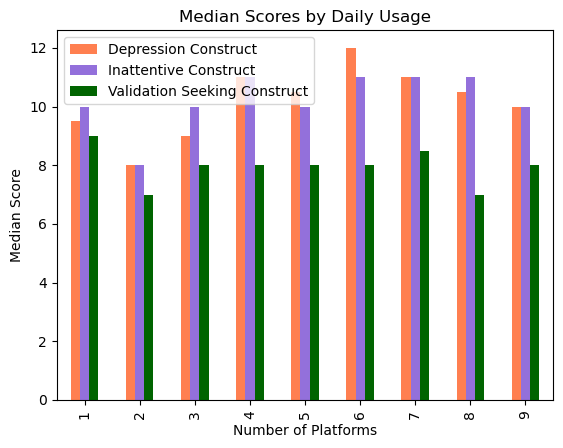

In [19]:
# #adding SM count - this is now done in cleanup section
# data_df["sm_count"]=data_df[["facebook","twitter","instagram","youtube","snapchat","discord","reddit","pinterest","tiktok"]].eq("Yes").sum(axis=1)

sm_df=data_df.groupby("platform_count",observed=False)


sm_df=pd.DataFrame(sm_df.median(numeric_only=True))
sm_df=sm_df.rename(columns={"depression_construct":"Depression Construct","inattentive_construct":"Inattentive Construct",
             "valid_seek_construct":"Validation Seeking Construct"})

sm_df[["Depression Construct","Inattentive Construct","Validation Seeking Construct"]].plot.bar(color=["coral","mediumpurple","darkgreen"],
                                                                           xlabel="Number of Platforms",ylabel="Median Score",title="Median Scores by Daily Usage")

plt.show()

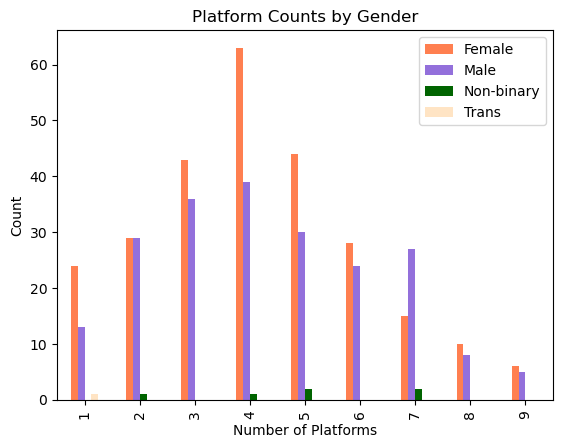

In [20]:
plat_count_df=pd.DataFrame({"Female":data_df[data_df["gender"]=="Female"].groupby("platform_count",observed=False).count()["ID_number"],
                            "Male":data_df[data_df["gender"]=="Male"].groupby("platform_count",observed=False).count()["ID_number"],
                           "Non-binary":data_df[data_df["gender"]=="Non-binary"].groupby("platform_count",observed=False).count()["ID_number"],
                           "Trans":data_df[data_df["gender"]=="Trans"].groupby("platform_count",observed=False).count()["ID_number"]})
plat_count_df=plat_count_df.fillna(0)
plat_count_df.plot.bar(color=["coral","mediumpurple","darkgreen","bisque"], xlabel="Number of Platforms",ylabel="Count",title="Platform Counts by Gender")
plt.show()

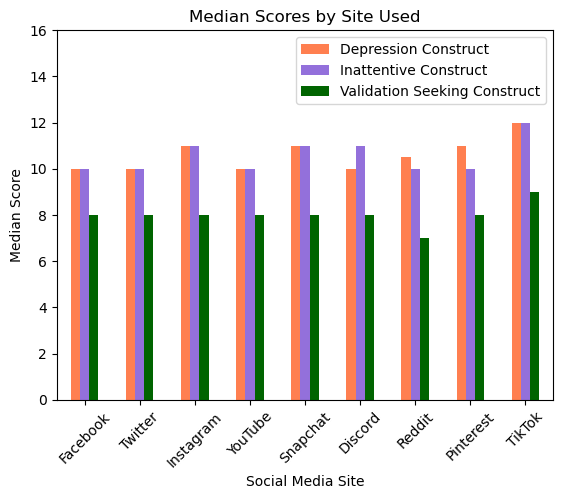

In [21]:
sm_med_df=pd.DataFrame({"Facebook":data_df[data_df["facebook"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Twitter":data_df[data_df["twitter"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Instagram":data_df[data_df["instagram"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "YouTube":data_df[data_df["youtube"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Snapchat":data_df[data_df["snapchat"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Discord":data_df[data_df["discord"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Reddit":data_df[data_df["reddit"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Pinterest":data_df[data_df["pinterest"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "TikTok":data_df[data_df["tiktok"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True)})
sm_med_df=sm_med_df.T
sm_med_df=sm_med_df.rename(columns={"depression_construct":"Depression Construct","inattentive_construct":"Inattentive Construct",
             "valid_seek_construct":"Validation Seeking Construct"})

sm_avg_df=pd.DataFrame({"Facebook":data_df[data_df["facebook"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Twitter":data_df[data_df["twitter"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Instagram":data_df[data_df["instagram"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "YouTube":data_df[data_df["youtube"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Snapchat":data_df[data_df["snapchat"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Discord":data_df[data_df["discord"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Reddit":data_df[data_df["reddit"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Pinterest":data_df[data_df["pinterest"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "TikTok":data_df[data_df["tiktok"]=="Yes"][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True)})
sm_avg_df=sm_avg_df.T

sm_avg_df=sm_avg_df.rename(columns={"depression_construct":"Depression Construct","inattentive_construct":"Inattentive Construct",
             "valid_seek_construct":"Validation Seeking Construct"})

sm_med_df.plot.bar(color=["coral","mediumpurple","darkgreen"],xlabel="Social Media Site",ylabel="Median Score",title="Median Scores by Site Used",ylim=(0,16),rot=45)

plt.savefig("output/mj_site_scores_all.png", bbox_inches='tight')
plt.show()

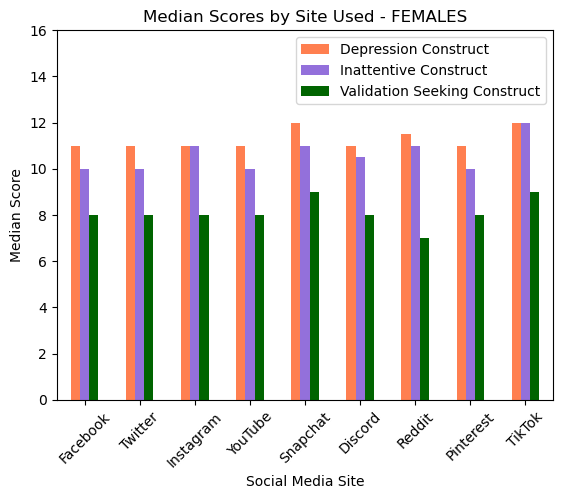

In [22]:
# FEMALES
sm_med_df=pd.DataFrame({"Facebook":data_df[(data_df["facebook"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Twitter":data_df[(data_df["twitter"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Instagram":data_df[(data_df["instagram"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "YouTube":data_df[(data_df["youtube"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Snapchat":data_df[(data_df["snapchat"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Discord":data_df[(data_df["discord"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Reddit":data_df[(data_df["reddit"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Pinterest":data_df[(data_df["pinterest"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "TikTok":data_df[(data_df["tiktok"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True)})
sm_med_df=sm_med_df.T
sm_med_df=sm_med_df.rename(columns={"depression_construct":"Depression Construct","inattentive_construct":"Inattentive Construct",
             "valid_seek_construct":"Validation Seeking Construct"})

sm_avg_df=pd.DataFrame({"Facebook":data_df[(data_df["facebook"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Twitter":data_df[(data_df["twitter"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Instagram":data_df[(data_df["instagram"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "YouTube":data_df[(data_df["youtube"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Snapchat":data_df[(data_df["snapchat"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Discord":data_df[(data_df["discord"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Reddit":data_df[(data_df["reddit"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Pinterest":data_df[(data_df["pinterest"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "TikTok":data_df[(data_df["tiktok"]=="Yes")&(data_df["gender"]=="Female")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True)})
sm_avg_df=sm_avg_df.T

sm_avg_df=sm_avg_df.rename(columns={"depression_construct":"Depression Construct","inattentive_construct":"Inattentive Construct",
             "valid_seek_construct":"Validation Seeking Construct"})

sm_med_df.plot.bar(color=["coral","mediumpurple","darkgreen"],xlabel="Social Media Site",ylabel="Median Score",title="Median Scores by Site Used - FEMALES",ylim=(0,16),rot=45)
plt.savefig("output/mj_site_scores_f.png", bbox_inches='tight')
plt.show()

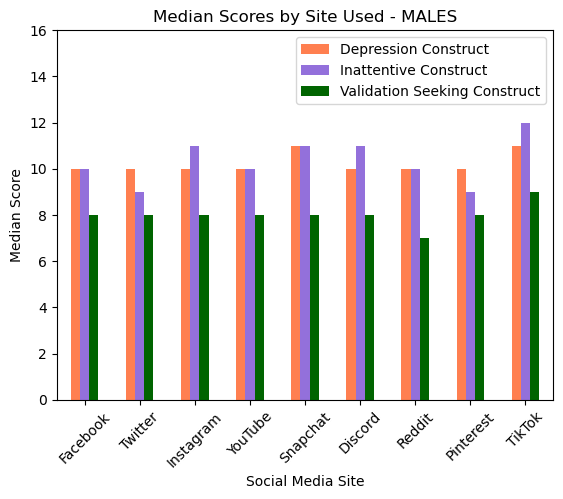

In [23]:
# MALES
sm_med_df=pd.DataFrame({"Facebook":data_df[(data_df["facebook"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Twitter":data_df[(data_df["twitter"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Instagram":data_df[(data_df["instagram"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "YouTube":data_df[(data_df["youtube"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Snapchat":data_df[(data_df["snapchat"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Discord":data_df[(data_df["discord"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Reddit":data_df[(data_df["reddit"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Pinterest":data_df[(data_df["pinterest"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "TikTok":data_df[(data_df["tiktok"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True)})
sm_med_df=sm_med_df.T
sm_med_df=sm_med_df.rename(columns={"depression_construct":"Depression Construct","inattentive_construct":"Inattentive Construct",
             "valid_seek_construct":"Validation Seeking Construct"})

sm_avg_df=pd.DataFrame({"Facebook":data_df[(data_df["facebook"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Twitter":data_df[(data_df["twitter"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Instagram":data_df[(data_df["instagram"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "YouTube":data_df[(data_df["youtube"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Snapchat":data_df[(data_df["snapchat"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Discord":data_df[(data_df["discord"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Reddit":data_df[(data_df["reddit"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "Pinterest":data_df[(data_df["pinterest"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True),
                        "TikTok":data_df[(data_df["tiktok"]=="Yes")&(data_df["gender"]=="Male")][["depression_construct","inattentive_construct","valid_seek_construct"]].mean(numeric_only=True)})
sm_avg_df=sm_avg_df.T

sm_avg_df=sm_avg_df.rename(columns={"depression_construct":"Depression Construct","inattentive_construct":"Inattentive Construct",
             "valid_seek_construct":"Validation Seeking Construct"})

sm_med_df.plot.bar(color=["coral","mediumpurple","darkgreen"],xlabel="Social Media Site",ylabel="Median Score",title="Median Scores by Site Used - MALES",ylim=(0,16),rot=45)
plt.savefig("output/mj_site_scores_m.png", bbox_inches='tight')
plt.show()

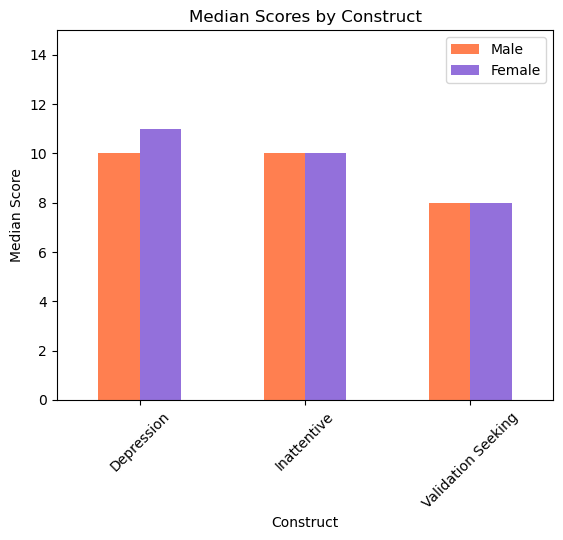

In [24]:
gender_construct_df=pd.DataFrame({"Male":data_df[data_df["gender"]=="Male"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True),
                        "Female":data_df[data_df["gender"]=="Female"][["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True)})
gender_construct_df=gender_construct_df.rename(index={"depression_construct":"Depression","inattentive_construct":"Inattentive","valid_seek_construct":"Validation Seeking"})
gender_construct_df.plot.bar(color=["coral","mediumpurple"],xlabel="Construct",ylabel="Median Score",title="Median Scores by Construct",ylim=(0,15),rot=45)
plt.savefig("output/mj_construct_scores_by_gender.png",bbox_inches="tight")
plt.show()

In [25]:
gender_construct_df

,Male,Female
Depression,10.0,11.0
Inattentive,10.0,10.0
Validation Seeking,8.0,8.0


In [26]:
data_df[["depression_construct","inattentive_construct","valid_seek_construct"]].median(numeric_only=True)

depression_construct     10.0
inattentive_construct    10.0
valid_seek_construct      8.0
dtype: float64

## Celina

In [27]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from pathlib import Path

In [28]:
# This portion was moved into the "Cleanup" section

# # read in csv file
# csv_file_path = Path("survey_data.csv")
# input_data = pd.read_csv(csv_file_path)

#### Mental Health Constructs (non-clinical)
Create three new variables that each combine three questions to create a "feelings of depression" construct, "inattentiveness construct", and a "validation seeking" construct. The maximum score for each of these constructs is 15. These constructs will allow us to explore overall mental health based on self-reported tendencies of survey participants.

In [29]:
# This portion was moved into the "Cleanup" section


# import csv

# # Define the input and output file paths
# input_file_path = "survey_data.csv"
# output_file_path = "survey_data_cleaned.csv"

# # Define the column indices for the existing variables
# feel_depressed_index = 27
# interest_in_daily_activ_index = 28
# bothered_by_worries_index = 22
# how_easily_distracted_index = 21
# difficult_to_concentrate_index = 23
# how_often_distracted_by_sm_index = 19
# compare_self_to_others_index = 24
# feel_about_comparisons_index = 25
# seek_validation_index = 26

# # Open the input CSV file and create a new CSV file for writing
# with open(input_file_path, 'r') as input_file, open(output_file_path, 'w', newline='') as output_file:
#     csv_reader = csv.reader(input_file)
#     csv_writer = csv.writer(output_file)

#     # Skip the header row
#     header = next(csv_reader)

#     # Write the header rows to the output file
#     header.append('depression_construct')
#     header.append('inattentive_construct')
#     header.append('valid_seek_construct')
#     csv_writer.writerow(header)

#     row_count = 0

#     # Iterate over each row in the input CSV file
#     for row in csv_reader:
#         row_count += 1
#         try:
#             # Print row data for debugging
#             print(f"Processing row {row_count}: {row}")

#             # Calculate the composite scores based on the existing variables and make them into integers
#             feel_depressed = int(row[feel_depressed_index])
#             interest_in_daily_activ = int(row[interest_in_daily_activ_index])
#             bothered_by_worries = int(row[bothered_by_worries_index])
#             depression_construct = feel_depressed + interest_in_daily_activ + bothered_by_worries

#             how_easily_distracted = int(row[how_easily_distracted_index])
#             difficult_to_concentrate = int(row[difficult_to_concentrate_index])
#             how_often_distracted_by_sm = int(row[how_often_distracted_by_sm_index])
#             inattentive_construct = how_easily_distracted + difficult_to_concentrate + how_often_distracted_by_sm

#             compare_self_to_others = int(row[compare_self_to_others_index])
#             feel_about_comparisons = int(row[feel_about_comparisons_index])
#             seek_validation = int(row[seek_validation_index])
#             valid_seek_construct = compare_self_to_others + feel_about_comparisons + seek_validation

#             # Add the composite score to the current row
#             row.append(depression_construct)
#             row.append(inattentive_construct)
#             row.append(valid_seek_construct)

#             # Write the updated row to the output file
#             csv_writer.writerow(row)
#         except ValueError as e:
#             print(f"Error processing row {row_count}: {e}. Skipping row.")

#     print(f"Total rows processed: {row_count}")

In [30]:
import csv
# read in csv file
csv_file_path = Path("survey_data_cleaned.csv")
clean_data_df = pd.read_csv(csv_file_path)
clean_data_df.head()

,ID_number,timestamp,age,gender,relationship_status,occupation_status,org_affiliations,use_social_media,facebook,twitter,...,difficult_to_concentrate,compare_self_to_others,feel_about_comparisons,seek_validation,feel_depressed,interest_in_daily_activ,sleep_issues,depression_construct,inattentive_construct,valid_seek_construct
0,1,4/18/2022 19:18,21.0,Male,In a relationship,University Student,University,Yes,Yes,Yes,...,5,2,3,2,5,4,5,11,13,7
1,2,4/18/2022 19:19,21.0,Female,Single,University Student,University,Yes,Yes,Yes,...,4,5,1,1,5,4,5,14,11,7
2,3,4/18/2022 19:25,21.0,Female,Single,University Student,University,Yes,Yes,No,...,4,3,3,1,4,2,5,11,8,7
3,4,4/18/2022 19:29,21.0,Female,Single,University Student,University,Yes,Yes,No,...,3,5,1,2,4,3,2,12,8,8
4,5,4/18/2022 19:33,21.0,Female,Single,University Student,University,Yes,Yes,No,...,5,3,3,3,4,4,1,13,14,9


In [31]:
# This portion was moved into the "Cleanup" section


# # Replace the bin labels using a dictionary to make hours into integer ranges
# clean_data_df['avg_time_per_day'] = clean_data_df['avg_time_per_day'].replace({
#                "Less than an Hour": '0-1',
#                "Between 1 and 2 hours": '1-2',
#                "Between 2 and 3 hours": '2-3', "Between 3 and 4 hours": '3-4',
#                "Between 4 and 5 hours":'4-5', "More than 5 hours": '>5'})

# Reorder the DataFrame based on the 'avg_time_per_day' column
clean_data_df= clean_data_df.sort_values('avg_time_per_day')

# Reset the index to start from 0
clean_data_df = clean_data_df.reset_index(drop=True)

# Display the updated DataFrame with mapped bin labels
clean_data_df['avg_time_per_day']

0      0-1
1      0-1
2      0-1
3      0-1
4      0-1
      ... 
475     5+
476     5+
477     5+
478     5+
479     5+
Name: avg_time_per_day, Length: 480, dtype: object

In [32]:
# Create a dataframe for average time spent on social media
average_time_df = clean_data_df.groupby('avg_time_per_day').size().reset_index(name='count')

# Calculate the total count of each reponse option
total_count = average_time_df['count'].sum()

#Add a new column for the percentage
# average_time_df['percentage'] = ((average_time_df['count']/ total_count)*100).round(2)

#Display the DataFrame with the new 'percentage' column
average_time_df

,avg_time_per_day,count
0,0-1,34
1,1-2,70
2,2-3,100
3,3-4,93
4,4-5,67
5,5+,116


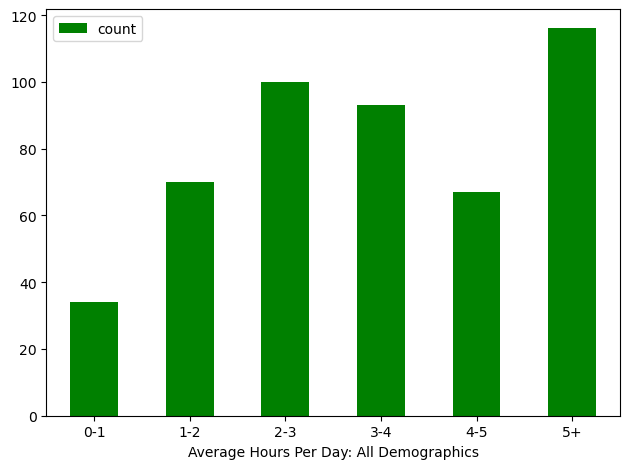

In [33]:
# Create a histogram showing Average Time Per Day distribution
average_time_df.plot(kind='bar', color='green')
plt.xticks(range(len(average_time_df)), average_time_df['avg_time_per_day'], rotation=0)
plt.xlabel("Average Hours Per Day: All Demographics")
plt.tight_layout()
plt.savefig('output/Average_Hours_Per_Day_All_Demographics.jpg', bbox_inches='tight')
plt.show()

In [34]:
print(clean_data_df.columns)

Index(['ID_number', 'timestamp', 'age', 'gender', 'relationship_status',
       'occupation_status', 'org_affiliations', 'use_social_media', 'facebook',
       'twitter', 'instagram', 'youtube', 'snapchat', 'discord', 'reddit',
       'pinterest', 'tiktok', 'platform_count', 'avg_time_per_day',
       'how_often_use_sm_without_purpose', 'how_often_distracted_by_sm',
       'feel_restless_wo_sm', 'how_easily_distracted', 'bothered_by_worries',
       'difficult_to_concentrate', 'compare_self_to_others',
       'feel_about_comparisons', 'seek_validation', 'feel_depressed',
       'interest_in_daily_activ', 'sleep_issues', 'depression_construct',
       'inattentive_construct', 'valid_seek_construct'],
      dtype='object')


In [35]:
# Convert avg_time_per_day into floats to enable correlation analysis
time_mapping = {'0-1': 0.5, '1-2': 1.5, '2-3': 2.5, '3-4': 3.5, '4-5': 4.5, '5+': 5.5}
clean_data_df['avg_time_numeric'] = clean_data_df['avg_time_per_day'].map(time_mapping)

# Define correlation
correlation = clean_data_df[["depression_construct", "inattentive_construct", "valid_seek_construct", "avg_time_numeric"]].corr()
print(correlation)

                       depression_construct  inattentive_construct  \
depression_construct               1.000000               0.636643   
inattentive_construct              0.636643               1.000000   
valid_seek_construct               0.438065               0.360239   
avg_time_numeric                   0.389734               0.409723   

                       valid_seek_construct  avg_time_numeric  
depression_construct               0.438065          0.389734  
inattentive_construct              0.360239          0.409723  
valid_seek_construct               1.000000          0.187174  
avg_time_numeric                   0.187174          1.000000  


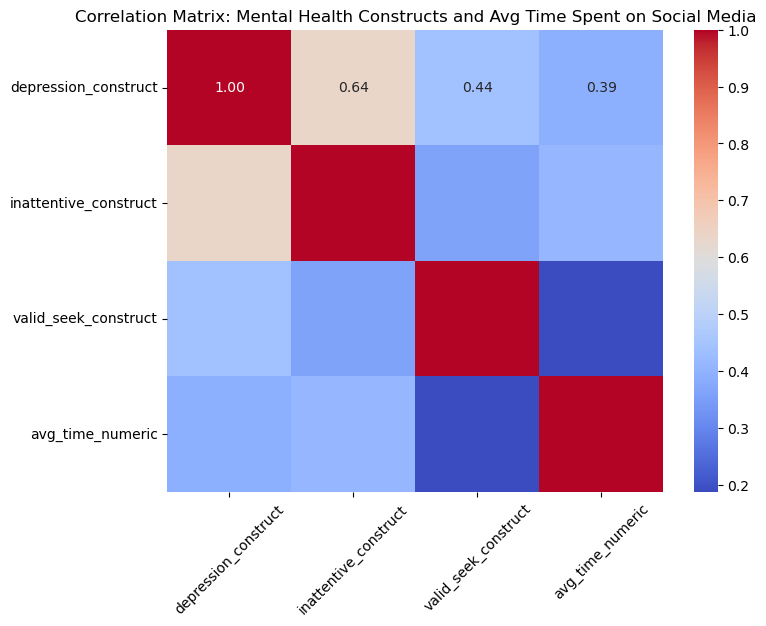

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Mental Health Constructs and Avg Time Spent on Social Media')
plt.xticks(rotation=45)
plt.savefig('output/Correlation_Matrix_Mental_Health_Constructs_vs_Avg_Time_Spent.jpg', bbox_inches='tight')
plt.show()

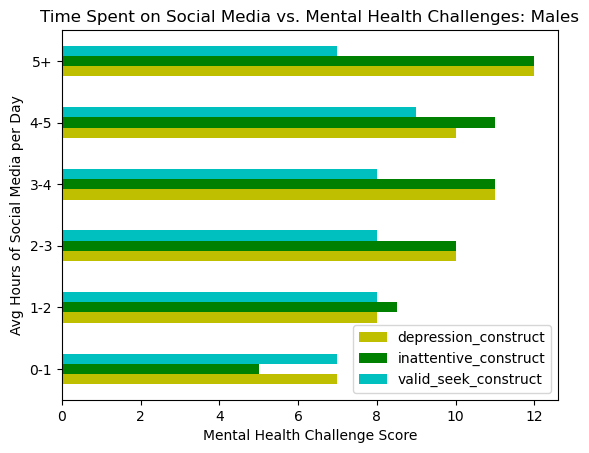

In [37]:
# Time spent on social media vs feelings of depression/inattention/validation seeking (groupby male)
males = clean_data_df.loc[clean_data_df['gender']== 'Male']
depressed_male_df = males.groupby(['avg_time_per_day']).median(numeric_only=True)
depressed_male_df = pd.DataFrame(depressed_male_df)
depressed_male_df

depressed_male_df[["depression_construct", "inattentive_construct", 
                   "valid_seek_construct"]].plot.barh(xlabel='Mental Health Challenge Score',
                                                      ylabel= 'Avg Hours of Social Media per Day',
                                                      title= 'Time Spent on Social Media vs. Mental Health Challenges: Males',
                                                      color=["y", "g", "c"])
plt.savefig('output/Male_Mental_Health_Barchart.jpg', bbox_inches='tight')
plt.show()

In [38]:
summary_stats_male = depressed_male_df[["depression_construct", "inattentive_construct", "valid_seek_construct"]].describe()
summary_stats_male

,depression_construct,inattentive_construct,valid_seek_construct
count,6.000000,6.000000,6.000000
mean,9.666667,9.583333,7.833333
std,1.861899,2.538044,0.752773
min,7.000000,5.000000,7.000000
25%,8.500000,8.875000,7.250000
50%,10.000000,10.500000,8.000000
75%,10.750000,11.000000,8.000000
max,12.000000,12.000000,9.000000


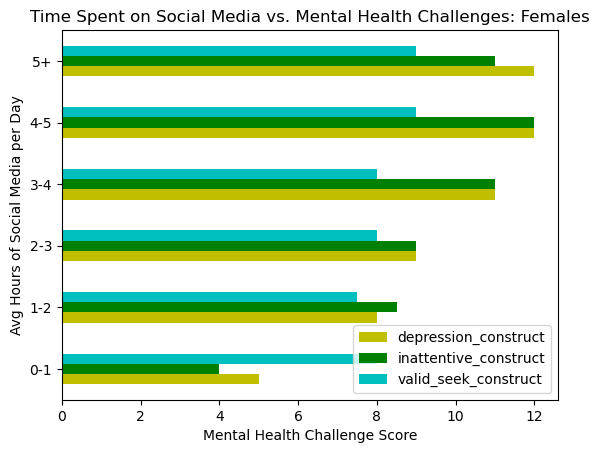

In [39]:
#Time spent on sm vs feelings of depression/inattention/validation seeking (groupby female)
females = clean_data_df.loc[clean_data_df['gender']== 'Female']
depressed_female_df = females.groupby(['avg_time_per_day']).median(numeric_only=True)
depressed_female_df = pd.DataFrame(depressed_female_df)
depressed_female_df

depressed_female_df[["depression_construct", "inattentive_construct", 
                   "valid_seek_construct"]].plot.barh(xlabel='Mental Health Challenge Score',
                                                      ylabel= 'Avg Hours of Social Media per Day',
                                                     title= 'Time Spent on Social Media vs. Mental Health Challenges: Females',
                                                     color=["y", "g", "c"])
plt.savefig('output/Female_Mental_Health_Barchart.jpg', bbox_inches='tight')
plt.show()

In [40]:
summary_stats_female = depressed_female_df[["depression_construct", "inattentive_construct", "valid_seek_construct"]].describe()
summary_stats_female

,depression_construct,inattentive_construct,valid_seek_construct
count,6.000000,6.000000,6.000000
mean,9.500000,9.250000,8.250000
std,2.738613,2.893959,0.612372
min,5.000000,4.000000,7.500000
25%,8.250000,8.625000,8.000000
50%,10.000000,10.000000,8.000000
75%,11.750000,11.000000,8.750000
max,12.000000,12.000000,9.000000


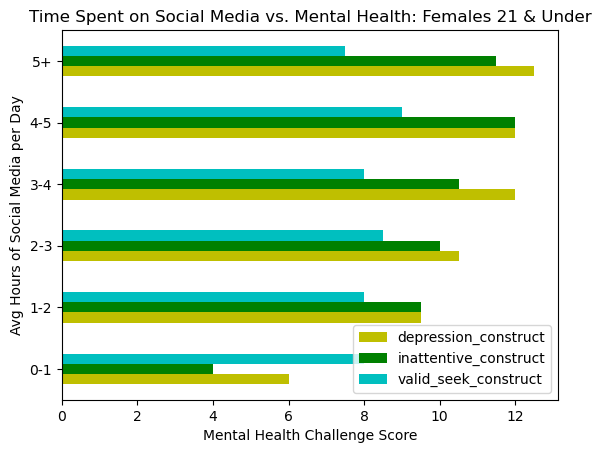

In [41]:
# Examine differences in mental health constructs for females 21 and under
young_females = clean_data_df.loc[(clean_data_df['gender']== 'Female') & (clean_data_df['age']<=21)]
depressed_young_fem_df = young_females.groupby('avg_time_per_day').median(numeric_only=True)

depressed_young_fem_df[["depression_construct", "inattentive_construct", 
                   "valid_seek_construct"]].plot.barh(xlabel='Mental Health Challenge Score',
                                                      ylabel= 'Avg Hours of Social Media per Day',
                                                     title= 'Time Spent on Social Media vs. Mental Health: Females 21 & Under',
                                                     color=["y", "g", "c"])
plt.savefig('output/Young_Female_Mental_Health_Barchart.jpg')
plt.show()

In [42]:
summary_stats_young_fem = depressed_young_fem_df[["depression_construct", "inattentive_construct", "valid_seek_construct"]].describe()
summary_stats_young_fem

,depression_construct,inattentive_construct,valid_seek_construct
count,6.000000,6.000000,6.000000
mean,10.416667,9.583333,8.166667
std,2.437553,2.888194,0.516398
min,6.000000,4.000000,7.500000
25%,9.750000,9.625000,8.000000
50%,11.250000,10.250000,8.000000
75%,12.000000,11.250000,8.375000
max,12.500000,12.000000,9.000000


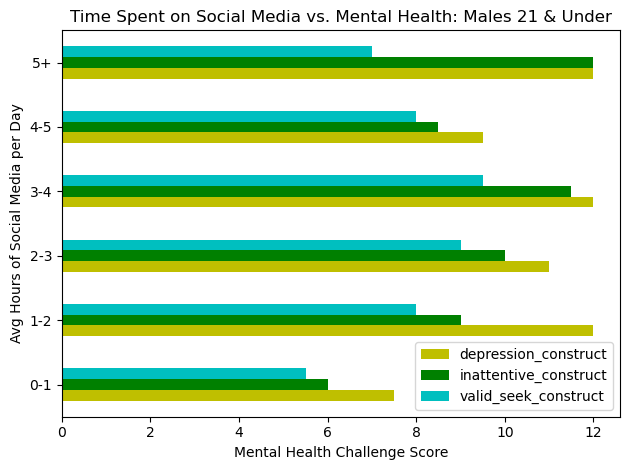

In [43]:
# Examine differences in mental health construct scores for males 21 and under
young_males = clean_data_df.loc[(clean_data_df['gender']== 'Male') & (clean_data_df['age']<=21)]
depressed_young_male_df = young_males.groupby('avg_time_per_day').median(numeric_only=True)

depressed_young_male_df[["depression_construct", "inattentive_construct", 
                   "valid_seek_construct"]].plot.barh(xlabel='Mental Health Challenge Score',
                                                      ylabel= 'Avg Hours of Social Media per Day',
                                                     title= 'Time Spent on Social Media vs. Mental Health: Males 21 & Under',
                                                     color=["y", "g", "c"])
plt.tight_layout()
plt.savefig('output/Young_Male_Mental_Health_Barchart.jpg')
plt.show()

In [44]:
summary_stats_young_male = depressed_young_male_df[["depression_construct", "inattentive_construct", "valid_seek_construct"]].describe()
summary_stats_male

,depression_construct,inattentive_construct,valid_seek_construct
count,6.000000,6.000000,6.000000
mean,9.666667,9.583333,7.833333
std,1.861899,2.538044,0.752773
min,7.000000,5.000000,7.000000
25%,8.500000,8.875000,7.250000
50%,10.000000,10.500000,8.000000
75%,10.750000,11.000000,8.000000
max,12.000000,12.000000,9.000000


## Belinda

In [45]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [46]:
#read in csv
survey_data_path = "survey_data_cleaned.csv"
survey_data = pd.read_csv(survey_data_path)

In [47]:
#create dataframe
survey_df = pd.DataFrame(survey_data)
survey_df.head()

,ID_number,timestamp,age,gender,relationship_status,occupation_status,org_affiliations,use_social_media,facebook,twitter,...,difficult_to_concentrate,compare_self_to_others,feel_about_comparisons,seek_validation,feel_depressed,interest_in_daily_activ,sleep_issues,depression_construct,inattentive_construct,valid_seek_construct
0,1,4/18/2022 19:18,21.0,Male,In a relationship,University Student,University,Yes,Yes,Yes,...,5,2,3,2,5,4,5,11,13,7
1,2,4/18/2022 19:19,21.0,Female,Single,University Student,University,Yes,Yes,Yes,...,4,5,1,1,5,4,5,14,11,7
2,3,4/18/2022 19:25,21.0,Female,Single,University Student,University,Yes,Yes,No,...,4,3,3,1,4,2,5,11,8,7
3,4,4/18/2022 19:29,21.0,Female,Single,University Student,University,Yes,Yes,No,...,3,5,1,2,4,3,2,12,8,8
4,5,4/18/2022 19:33,21.0,Female,Single,University Student,University,Yes,Yes,No,...,5,3,3,3,4,4,1,13,14,9


In [48]:
#count of null
#conclusion: only null in org_affiliations. not of concern.
nan_count = survey_df.isnull().sum()
print(f"number of NaN values{nan_count}")

number of NaN valuesID_number                            0
timestamp                            0
age                                  0
gender                               0
relationship_status                  0
occupation_status                    0
org_affiliations                    30
use_social_media                     0
facebook                             0
twitter                              0
instagram                            0
youtube                              0
snapchat                             0
discord                              0
reddit                               0
pinterest                            0
tiktok                               0
platform_count                       0
avg_time_per_day                     0
how_often_use_sm_without_purpose     0
how_often_distracted_by_sm           0
feel_restless_wo_sm                  0
how_easily_distracted                0
bothered_by_worries                  0
difficult_to_concentrate             0
compa

In [49]:
#create variable to hold gender count
gender_check = survey_df["gender"].value_counts()
gender_check

gender
Female        262
Male          211
Non-binary      6
Trans           1
Name: count, dtype: int64

In [50]:
# This section was moved to the "Cleanup" section

# NB_variations = ["Nonbinary","NB","unsure","There are others???", "Non binary"]

# survey_df["gender"] = survey_df["gender"].str.strip()

# for variation in NB_variations:
#     survey_df.loc[survey_df["gender"] == variation, "gender"] = "Non-binary"

In [51]:
gender = survey_df["gender"].value_counts()
gender

gender
Female        262
Male          211
Non-binary      6
Trans           1
Name: count, dtype: int64

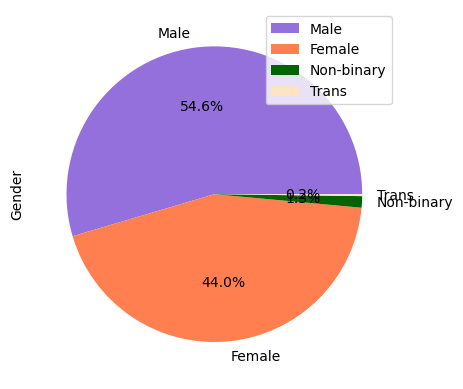

In [52]:
#create labels with elements in "gender" column
gender_labels = []
for i in survey_df["gender"]:
    if i not in gender_labels:
        gender_labels.append(i)

gender_colors = ["mediumpurple", "coral", "darkgreen", "bisque"]
#create pie chart: use of Social Media by gender
gender.plot(kind = "pie", labels = gender_labels, autopct = "%1.1f%%", ylabel = "Gender", colors = gender_colors)
plt.legend(gender_labels, loc="upper right")
plt.savefig("output/BH_gender_pie")
plt.show()


# Gender Pie Chart Summary #
Our dataset had slightly more male-identifying survey participants than other genders at 54.7% followed by Females at 43.9%, Non-binary at 1.2%, and trans at 0.2%. 

In [53]:
#create stacked bar chart of social media usage by gender

#create a dataframe of social media platform by gender
platforms = ["Facebook", "Twitter", "Instagram", "YouTube", "Snapchat", "Discord", "Reddit", "Pinterest", "TikTok"]
platform_gender_dict = {"Gender":gender_labels,
                        "Facebook_count": "",
                        "Twitter_count": "",
                        "Instagram_count": "",
                        "YouTube_count": "",
                        "Snapchat_count": "",
                        "Discord_count": "",
                        "Reddit_count": "",
                        "Pinterest_count": "",
                        "TikTok_count": ""}
platform_gender_df = pd.DataFrame(platform_gender_dict)

In [54]:
platform_gender_df.set_index("Gender", inplace = True)

In [55]:
def platform_gender_fn(gendercol, platform_count, dfplatformcol):
    platform_gender_df.loc[gendercol,platform_count]=survey_df.loc[(survey_df["gender"] == gendercol) & (survey_df[dfplatformcol] == "Yes")].shape[0]

In [56]:
for index, row in platform_gender_df.iterrows():
    platform_gender_fn(index, "Facebook_count", "facebook")
    platform_gender_fn(index, "Twitter_count", "twitter")
    platform_gender_fn(index, "Instagram_count", "instagram")
    platform_gender_fn(index, "YouTube_count", "youtube")
    platform_gender_fn(index, "Snapchat_count", "snapchat")
    platform_gender_fn(index, "Discord_count", "discord")
    platform_gender_fn(index, "Reddit_count", "reddit")
    platform_gender_fn(index, "Pinterest_count", "pinterest")
    platform_gender_fn(index, "TikTok_count", "tiktok")

In [57]:
platform_gender_df = platform_gender_df.T

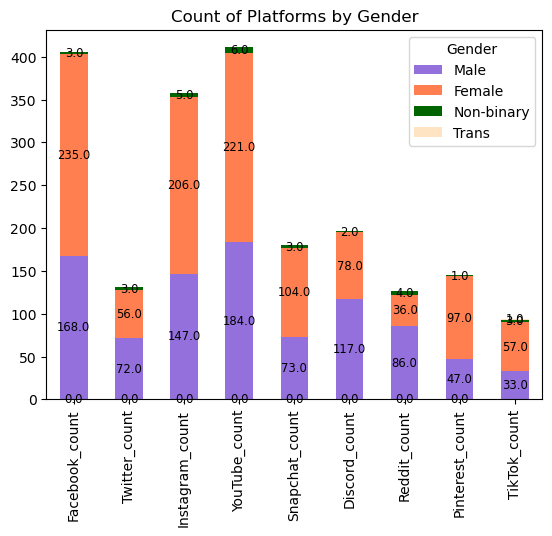

In [58]:
ax_1 = platform_gender_df.plot(kind = "bar", stacked = True, legend = True, color = gender_colors)
for i in ax_1.patches:
    ax_1.text(i.get_x() + i.get_width()/2,
            i.get_y() + i.get_height()/2,
            str(i.get_height()),
             fontsize = "small",
            ha = "center", va = "center")
plt.title("Count of Platforms by Gender")
plt.savefig("output/BH_gender_platform_bar")
plt.show()


# Gender and Platform Bar Chart Summary #
The top 3 platforms that the survey participants in our dataset use are YouTube, Facebook, and Instagram. Although our sample has more males-identifying participants overall, there are more female-identifying participants that use the top 3 platforms and across all other platforms except for Twitter, Discord, and Reddit. This might mean that female-identifying participants gravitate more toward platforms designed for social networking while male-identifying participants gravitate more toward platforms designed for communications within communities. 

Note: the survey question asked participants "What social media platforms do you commonly use?" Our group parsed these answers and assigned "yes/no" values to each platform. As such, the counts on this visualization represent multiple platforms per participant and does not give any magnitude of each platform (e.g., someone can list both Instagram and Reddit but use Instagram much more).

In [59]:
#box and whiskers of age

# This was moved to the "Cleanup" section
#age 91 might be a typo - drop entire row
# survey_df = survey_df.loc[survey_df["age"] != 91]

#Determine outliers
quartiles = survey_df["age"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outliers = survey_df["age"].loc[(survey_df["age"] < lower_bound) | (survey_df["age"] > upper_bound)]
print(f"the lower bound of age is {lower_bound} and the upper bound is {upper_bound} with {len(list(outliers))} outliers: {list(outliers)}")

percentage_outliers = (len(outliers) / len(survey_df)) * 100

print(f"outliers make up {percentage_outliers:.2f}% of the dataset")

mean_age = survey_df["age"].mean()
median_age = survey_df["age"].median()
print("="*50)

print(f"the mean age of the survey is {mean_age} and median is {median_age}")

print("="*50)



the lower bound of age is 13.5 and the upper bound is 33.5 with 83 outliers: [34.0, 35.0, 35.0, 35.0, 56.0, 65.0, 40.0, 55.0, 38.0, 48.0, 47.0, 48.0, 47.0, 47.0, 34.0, 48.0, 50.0, 47.0, 38.0, 50.0, 49.0, 47.0, 48.0, 51.0, 50.0, 47.0, 40.0, 46.0, 47.0, 47.0, 48.0, 49.0, 47.0, 50.0, 48.0, 47.0, 36.0, 37.0, 48.0, 48.0, 48.0, 47.0, 47.0, 48.0, 48.0, 47.0, 35.0, 37.0, 48.0, 47.0, 45.0, 47.0, 47.0, 42.0, 35.0, 38.0, 34.0, 48.0, 37.0, 50.0, 46.0, 36.0, 69.0, 34.0, 34.0, 36.0, 43.0, 37.0, 35.0, 52.0, 44.0, 44.0, 35.0, 60.0, 49.0, 34.0, 56.0, 51.0, 50.0, 13.0, 13.0, 35.0, 53.0]
outliers make up 17.29% of the dataset
the mean age of the survey is 26.001458333333336 and median is 22.0


In [60]:
outliers_series = pd.DataFrame(outliers)
outliers_series.head()

,age
19,34.0
25,35.0
27,35.0
31,35.0
42,56.0


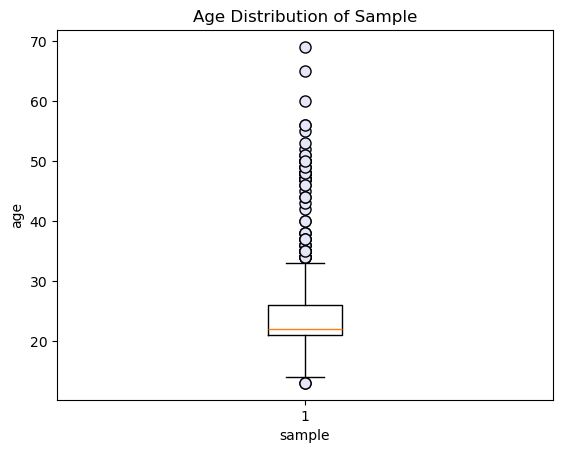

In [61]:
#plot box and whiskers
flierprops = dict(marker = "o", markerfacecolor = "lavender", markeredgecolor = "black", markersize = 8)
plt.boxplot(survey_df["age"], flierprops = flierprops)
plt.xlabel("sample")
plt.ylabel("age")
plt.title("Age Distribution of Sample")
plt.savefig("output/BH_age_box")
plt.show()


In [62]:
var = np.var(survey_df["age"])
std = np.std(survey_df["age"])
sem = st.sem(survey_df["age"])

print(f"the variance of age in our data set is {var}, standard deviation is {std}, and standard error from the mean is {sem}.")
print("="*50)
print(f"there are {len(survey_df)} records in the dataset.")

the variance of age in our data set is 89.52601870659733, standard deviation is 9.461818995658145, and standard error from the mean is 0.4323215446491695.
there are 480 records in the dataset.


# Age Distribution Box and Whiskers Plot Summary #
The age distribution of the survey participants in our dataset has a relatively small standard deviation compared to the total age range (i.e., 9.5 standard deviation in a dataset with age range 13-69). This means most of the data is clustered around the mean age of 26. Additionally, the median age of the survey participants in our dataset is 22. This is consistent with the fact that the survey was conducted as part of a project for a university statistics course. There are 83 outliers out of 480 records, about 17% of all survey participants. Although the distribution of the dataset is not very large and mostly represents a younger demographic, there is still representation across a wide age range. 

It is important to keep in mind that this may not be very representative of the population as a whole and the results should not be extrapolated to draw conclusions as such.

In [63]:
# This has been moved to the "CLeanup" section

# # Map the bin labels using a dictionary
# survey_df['avg_time_per_day'] = survey_df['avg_time_per_day'].replace({
#                "Less than an Hour": '0-1',
#                "Between 1 and 2 hours": '1-2',
#                "Between 2 and 3 hours": '2-3', "Between 3 and 4 hours": '3-4',
#                "Between 4 and 5 hours":'4-5', "More than 5 hours": '>5'})


In [64]:
#check for min age
survey_df["age"].min()

13.0

In [65]:
#check max age after dropping 91
survey_df["age"].max()

69.0

In [66]:
#bin ages
age_bins = [0, 18, 24, 30, 50, 70]
age_bin_labels = ["<18", "18-24", "25-30", "31-50", "50+"]
age_colors = ["mediumpurple", "coral", "darkgreen", "bisque", "olive"]
survey_df["Age Range"]=pd.cut(survey_df["age"], bins = age_bins, labels=age_bin_labels, include_lowest=True)               

In [67]:
#create new df for age and time
keep_col = ["ID_number", "age", "Age Range", "avg_time_per_day"]
age_time_df = survey_df[keep_col]
age_time_df

,ID_number,age,Age Range,avg_time_per_day
0,1,21.0,18-24,2-3
1,2,21.0,18-24,5+
2,3,21.0,18-24,3-4
3,4,21.0,18-24,5+
4,5,21.0,18-24,2-3
...,...,...,...,...
475,477,24.0,18-24,2-3
476,478,26.0,25-30,1-2
477,479,29.0,25-30,2-3
478,480,21.0,18-24,2-3


In [68]:
#calculate counts of observations for each combination of bins:
age_time_combo = pd.crosstab(age_time_df["Age Range"],age_time_df["avg_time_per_day"])
#transpose age time combo to get avg time on y-axis when plotting
age_time_combo = age_time_combo.T
age_time_combo

Age Range,<18,18-24,25-30,31-50,50+
avg_time_per_day,,,,,
0-1,1,10,3,19,1
1-2,2,27,11,25,5
2-3,7,61,13,17,2
3-4,7,66,10,9,1
4-5,6,43,13,5,0
5+,9,89,14,3,1


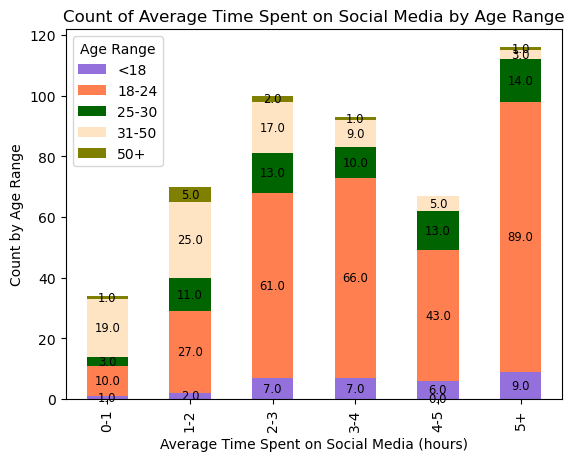

In [69]:
#create stacked bar chart of avg. time spent on social media by age
ax = age_time_combo.plot(kind="bar", stacked = True, color = age_colors)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2,
            i.get_y() + i.get_height()/2,
            str(i.get_height()),
             fontsize = "small",
            ha = "center", va = "center")

plt.xlabel("Average Time Spent on Social Media (hours)")
plt.ylabel("Count by Age Range")
plt.title("Count of Average Time Spent on Social Media by Age Range")
plt.savefig("output/BH_time_age_bar")

In [70]:
percent_list_18under = []
percent_list_18to24 = []
percent_list_25to30 = []
percent_list_31to50 = []
percent_list_50plus = []
for index, row in age_time_combo.iterrows():
    a_under_18 = f"{round(row[0]/age_time_combo.loc[index].sum(axis=0)*100,2)}%"
    b_18to24 = f"{round(row[1]/age_time_combo.loc[index].sum(axis=0)*100,2)}%"
    c_25to30 = f"{round(row[2]/age_time_combo.loc[index].sum(axis=0)*100,2)}%"
    d_31to50 = f"{round(row[3]/age_time_combo.loc[index].sum(axis=0)*100,2)}%"
    d_50plus = f"{round(row[4]/age_time_combo.loc[index].sum(axis=0)*100,2)}%"
    percent_list_18under.append(a_under_18)
    percent_list_18to24.append(b_18to24)
    percent_list_25to30.append(c_25to30)
    percent_list_31to50.append(d_31to50)
    percent_list_50plus.append(d_50plus)

/var/folders/xs/5f48qdbj16x7s4s_qtmvjgwc0000gp/T/ipykernel_13396/2961680374.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a_under_18 = f"{round(row[0]/age_time_combo.loc[index].sum(axis=0)*100,2)}%"
/var/folders/xs/5f48qdbj16x7s4s_qtmvjgwc0000gp/T/ipykernel_13396/2961680374.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b_18to24 = f"{round(row[1]/age_time_combo.loc[index].sum(axis=0)*100,2)}%"
/var/folders/xs/5f48qdbj16x7s4s_qtmvjgwc0000gp/T/ipykernel_13396/2961680374.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

In [71]:
#create list of overall age % represented in dataset
agecount_df = pd.DataFrame(survey_df.groupby("Age Range").size())
agecount_df["percent of total"]=""
agecount_df
for index, row in agecount_df.iterrows():
    agecount_df.loc[index,"percent of total"] = f"{round((row[0]/len(survey_df))*100,2)}%"
age_percent_list = list(agecount_df["percent of total"])      
agecount_df

/var/folders/xs/5f48qdbj16x7s4s_qtmvjgwc0000gp/T/ipykernel_13396/1189036546.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agecount_df = pd.DataFrame(survey_df.groupby("Age Range").size())


,0,percent of total
Age Range,,
<18,32,6.67%
18-24,296,61.67%
25-30,64,13.33%
31-50,78,16.25%
50+,10,2.08%


In [72]:
age_percent_list

['6.67%', '61.67%', '13.33%', '16.25%', '2.08%']

In [73]:
#create dataframe for % of each age range by average time per day to compare to representation of that age range in overall dataset
atp_dict = {"avg_time_per_day":age_time_combo.index,
            "<18": percent_list_18under,
            "18-24": percent_list_18to24,
            "25-30": percent_list_25to30,
            "31-50": percent_list_31to50,
            "50+": percent_list_50plus}
atp_df = pd.DataFrame(atp_dict)
atp_df.set_index("avg_time_per_day", inplace=True)
atp_df.loc[-1]= age_percent_list
atp_df.rename(index={-1: 'Total % by age in sample'}, inplace = True)
atp_df

,<18,18-24,25-30,31-50,50+
avg_time_per_day,,,,,
0-1,2.94%,29.41%,8.82%,55.88%,2.94%
1-2,2.86%,38.57%,15.71%,35.71%,7.14%
2-3,7.0%,61.0%,13.0%,17.0%,2.0%
3-4,7.53%,70.97%,10.75%,9.68%,1.08%
4-5,8.96%,64.18%,19.4%,7.46%,0.0%
5+,7.76%,76.72%,12.07%,2.59%,0.86%
Total % by age in sample,6.67%,61.67%,13.33%,16.25%,2.08%


In [74]:
age_time_combo
age_time_file = age_time_combo.to_csv("output/age_time_file.csv")

# Count of Avg. Time Spent on SM by Age Range Bar Chart Summary #
 In the bar chart of avg time spent on social media by age range, 116 out of 480 of the survey participants, or 24%, spent more than 5 hours on social media. This was the highest count of participants out of all time ranges, followed by the 2-3 hour and 3-4 hour ranges at 21% and 19% respectively. The vast majority  (77%) of those that said they spent 5+ hours on social media fell within the 18-24 age range, even though they only represent 62% of the total dataset. 

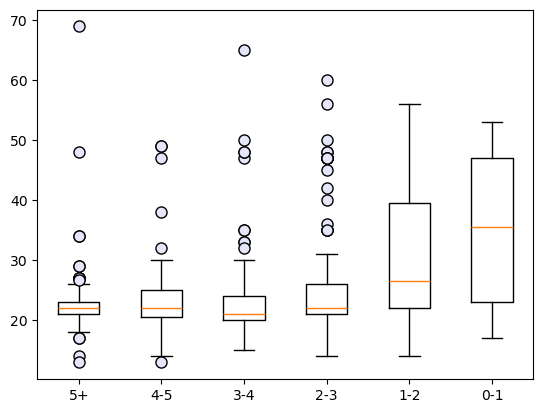

In [75]:
#TBD: is this even useful? box and whiskers of age by social media usage
#not used in presentation

avg_time_count = age_time_df["avg_time_per_day"].value_counts()
avg_time_df=pd.DataFrame(avg_time_count)
avg_time_df.sort_index(ascending=False, inplace=True)
avg_time_list = list(avg_time_df.index)
avg_time_list

age_list = []

for time in avg_time_list:
    #locate the rows which contain student on each time and get age
    student_age = age_time_df.loc[age_time_df["avg_time_per_day"] == time, "age"]
    age_list.append(student_age)
                                  
    #Determine outliers
    quartiles_bytime = age_time_df["age"].quantile([0.25, 0.5, 0.75])
    lowerq_bytime = quartiles[0.25]
    upperq_bytime = quartiles[0.75]
    iqr_bytime = upperq_bytime-lowerq_bytime
    lower_bound_bytime = lowerq_bytime - (1.5*iqr_bytime)
    upper_bound_bytime = upperq_bytime + (1.5*iqr_bytime)

    outliers_bytime = age_time_df["age"].loc[(age_time_df["age"] < lower_bound_bytime) | (age_time_df["age"] > upper_bound_bytime)]

flierprops_bytime = dict(marker="o", markerfacecolor = "red", markersize = 12)
plt.boxplot(age_list, labels = avg_time_list, flierprops = flierprops)
plt.show()

In [76]:
#create occupation labels
occupation = survey_df["occupation_status"].value_counts()
occupation_series = pd.Series(occupation)

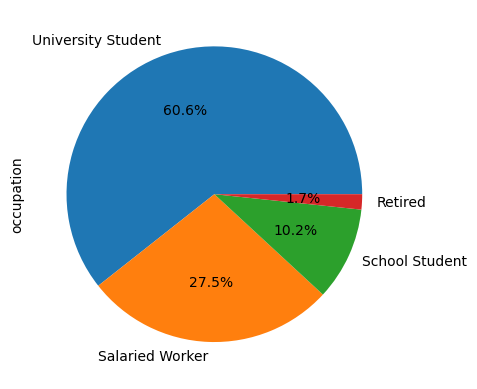

In [77]:
#not used in presentation
#create pie chart: occupation summary
occupation_series.plot(kind = "pie", labels = occupation_series.index, autopct = "%1.1f%%", ylabel = "occupation")
plt.show()

In [78]:
#plot avg. time spent groupby age

#time_spent = survey_df.groupby("age")

#create age bins
age_bins = [0, 18, 24, 30, 50, 92]
age_bin_labels = ["<18", "18-24", "25-30", "31-50", "50+"]

# #create dictionary for age_time df
# age_time_dict = {"age_range":age_bins,
#                "More than 5 hours":"",
#                "Between 4 and 5 hours":"",
#                "Between 3 and 4 hours":"",
#                 "Between 2 and 3 hours":"",
#                "Between 1 and 2 hours":"",
#                "Less than an Hour":""}
# #create dataframe
# age_time_df = pd.DataFrame(age_time_dict)
               
# age_time_df["Age Range"]=pd.cut(survey_df["age"], bins = age_bins, labels=age_labels, include_lowest=True)               
# #create labels for time spent